=== Dataset Statistics ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000   

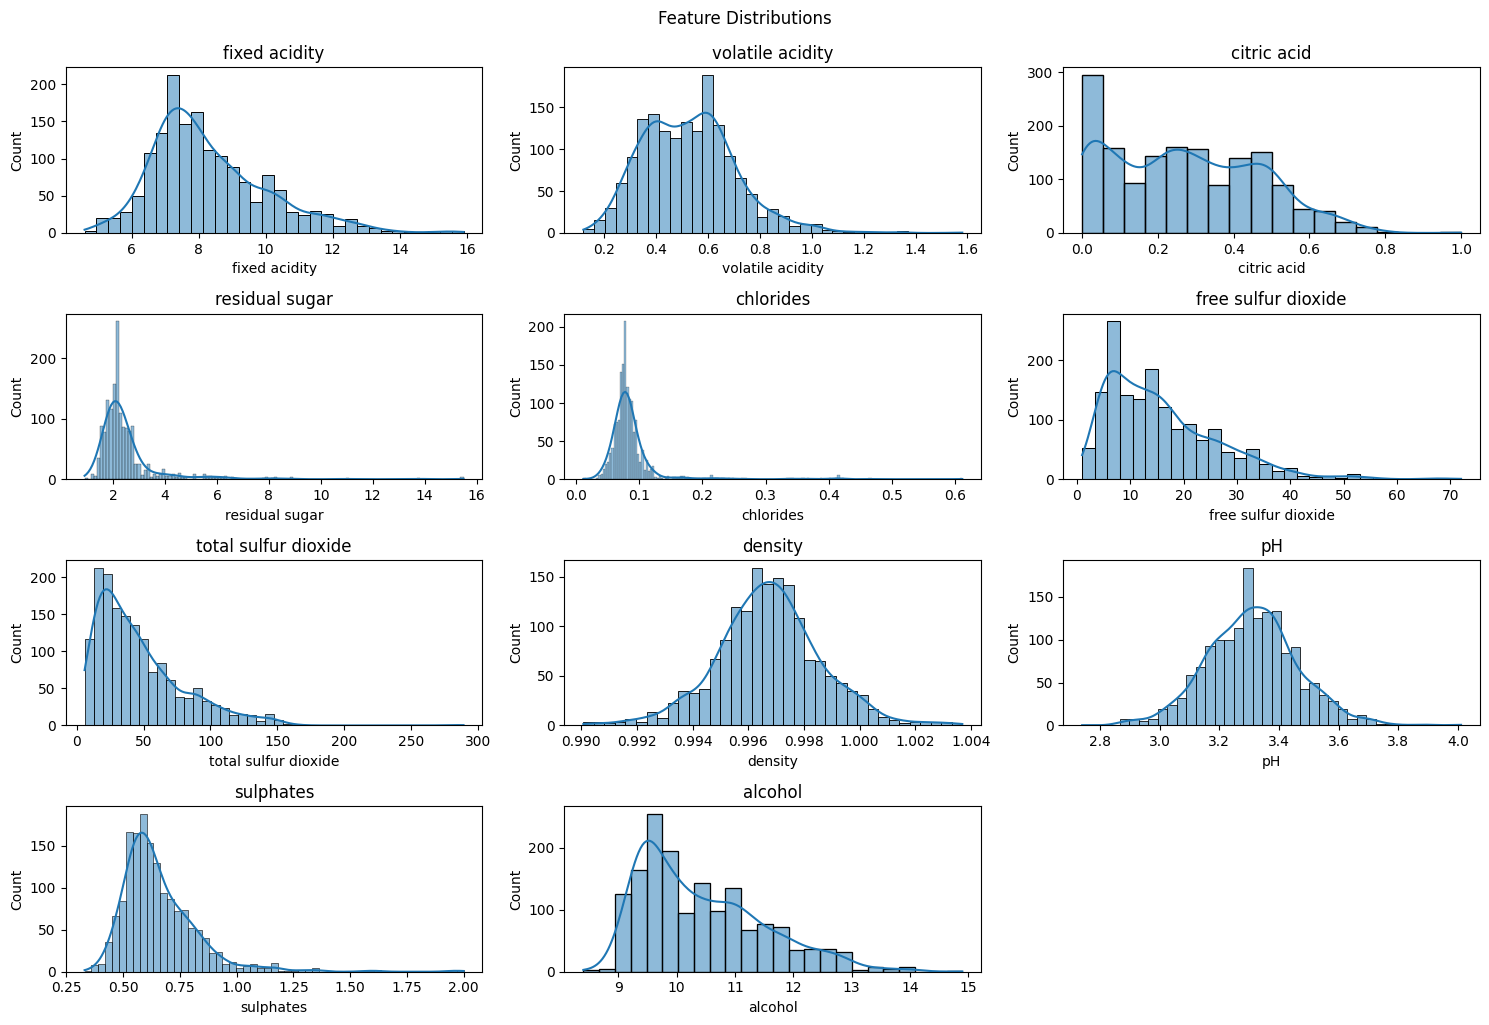

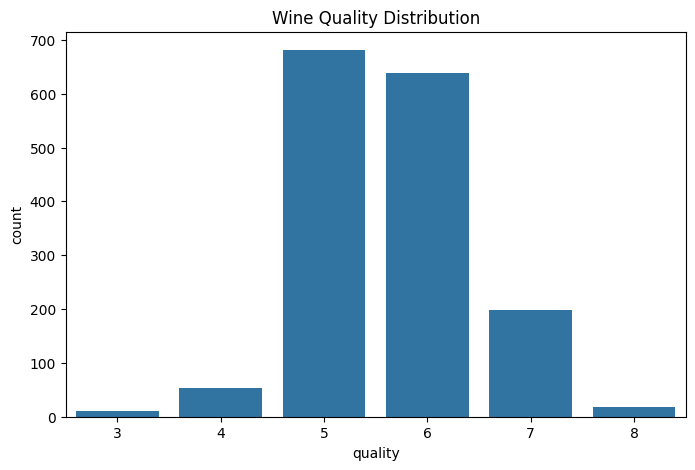

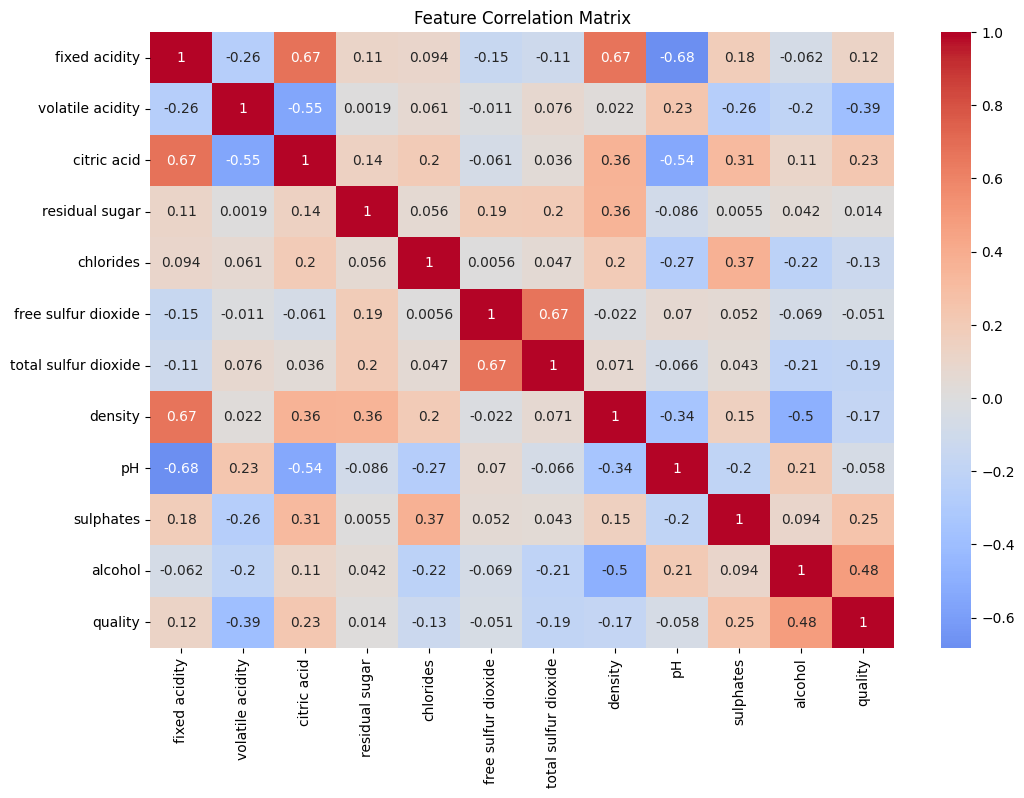

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Wine Quality - UCI)
data = pd.read_csv('data/orignal/winequality-red.csv')

# Preprocessing
X = data.drop('quality', axis=1)  # Features (acidity, pH, alcohol, etc.)
y = data['quality']               # Target (wine quality score: 3-9)

# Basic statistics
print("=== Dataset Statistics ===")
print(data.describe())
print("\n=== Quality Distribution ===")
print(data['quality'].value_counts().sort_index())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save processed data
pd.DataFrame(X_train).to_csv('data/preprocessed/X_train.csv', index=False)
pd.DataFrame(y_train).to_csv('data/preprocessed/y_train.csv', index=False)
pd.DataFrame(X_test).to_csv('data/preprocessed/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv('data/preprocessed/y_test.csv', index=False)

# Visualize feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):  # Exclude quality column
    plt.subplot(4, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Quality distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data)
plt.title("Wine Quality Distribution")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions_RF = rf.predict(X_test)
pd.DataFrame(predictions_RF).to_csv('data/results/predictions_RF.csv')

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
predictions_SVM = svm.predict(X_test)
pd.DataFrame(predictions_SVM).to_csv('data/results/predictions_SVM.csv')

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
predictions_NB = nb.predict(X_test)
pd.DataFrame(predictions_NB).to_csv('data/results/predictions_NB.csv')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Ensure data is numpy array and float32
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

# Adjust target for multi-class classification (quality scores 3-9 → 0-6)
y_train_adj = y_train - 3
y_test_adj = y_test - 3

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes (0-6 representing quality 3-9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_adj,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

# Predictions
predictions_ANN = model.predict(X_test).argmax(axis=1) + 3  # Convert back to original scale
pd.DataFrame(predictions_ANN).to_csv('data/results/predictions_ANN.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_LR = lr.predict(X_test).round().astype(int)  # Round to nearest quality score
pd.DataFrame(predictions_LR).to_csv('data/results/predictions_LR.csv')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Random Forest": predictions_RF,
    "SVM": predictions_SVM,
    "Naive Bayes": predictions_NB,
    "ANN": predictions_ANN,
    "Linear Regression": predictions_LR
}

for name, pred in models.items():
    print(f"----- {name} -----")
    print(classification_report(y_test, pred))
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}\n")

----- Random Forest -----
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.63      0.71      0.67       132
           7       0.62      0.48      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

Accuracy: 0.66

----- SVM -----
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m